Assignment 3: Regression and Regularization

John Reid (216933830)

Import packages

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

Import the dataset

In [120]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\Data Science\kc_house_data.csv")

Gain a quick overview of the data to better understand it

In [121]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [123]:
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [124]:
df[['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living']].describe(include='all')

,price,bedrooms,bathrooms,floors,sqft_living
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,1.494309,2079.899736
std,3.671272e+05,0.930062,0.770163,0.539989,918.440897
min,7.500000e+04,0.000000,0.000000,1.000000,290.000000
25%,3.219500e+05,3.000000,1.750000,1.000000,1427.000000
50%,4.500000e+05,3.000000,2.250000,1.500000,1910.000000
75%,6.450000e+05,4.000000,2.500000,2.000000,2550.000000
max,7.700000e+06,33.000000,8.000000,3.500000,13540.000000


Check if there are any duplicates from the dataset by dropping them

In [125]:
df.drop_duplicates(inplace = True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

I began checking variables to see if there were any clear and obvious outliers that I should drop before continuing my analysis. The only one I was able to find was a house that had over 33 bedrooms without a large increase in price. I assumed this was an input error and removed it. 

<Axes: xlabel='bedrooms', ylabel='Count'>

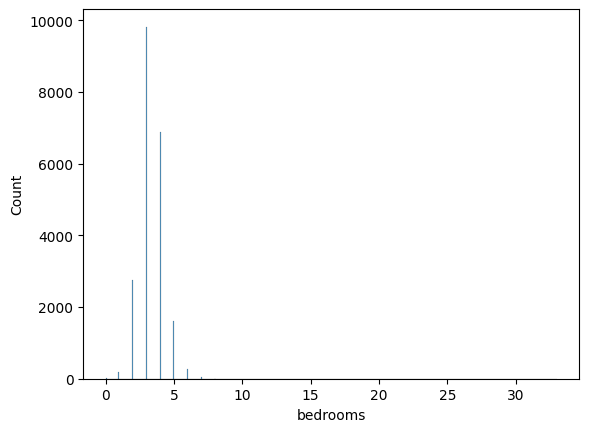

In [127]:
sns.histplot(df['bedrooms'])

In [128]:
df[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [129]:
df.drop(15870, axis = 0, inplace = True)

I then made sure to check the graph again to ensure everything looked right

<Axes: xlabel='bedrooms', ylabel='Count'>

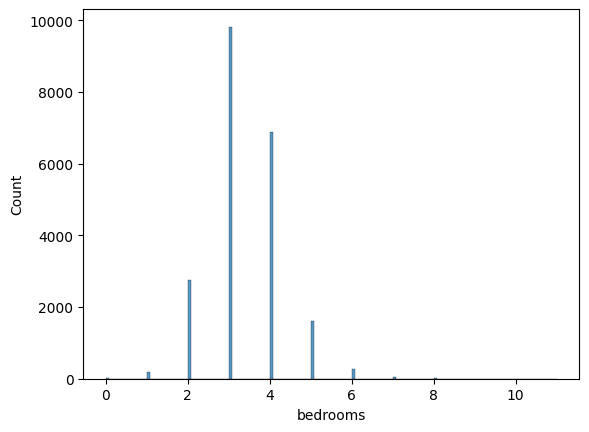

In [130]:
sns.histplot(df['bedrooms'])

I came back from later on to add this piece of code as I deemed the RMSE I was getting from the models too. To be able to better predict the price of houses I decided to get rid of the price outliers. To do this I looked at which values fell outside three standard deviations from the mean. With this change I got rid of 406 entries in the dataset that were complicating the models. With this removal I was able to achieve more accurate models later on in the assignment.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  object 
 2   price          21612 non-null  float64
 3   bedrooms       21612 non-null  int64  
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21612 non-null  int64  
 6   sqft_lot       21612 non-null  int64  
 7   floors         21612 non-null  float64
 8   waterfront     21612 non-null  int64  
 9   view           21612 non-null  int64  
 10  condition      21612 non-null  int64  
 11  grade          21612 non-null  int64  
 12  sqft_above     21612 non-null  int64  
 13  sqft_basement  21612 non-null  int64  
 14  yr_built       21612 non-null  int64  
 15  yr_renovated   21612 non-null  int64  
 16  zipcode        21612 non-null  int64  
 17  lat            21612 non-null  float64
 18  long       

In [132]:
mean = df['price'].mean()
std = df['price'].std()
outlier = mean + 3 * std
df = df[df['price'] <= outlier]

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21206 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21206 non-null  int64  
 1   date           21206 non-null  object 
 2   price          21206 non-null  float64
 3   bedrooms       21206 non-null  int64  
 4   bathrooms      21206 non-null  float64
 5   sqft_living    21206 non-null  int64  
 6   sqft_lot       21206 non-null  int64  
 7   floors         21206 non-null  float64
 8   waterfront     21206 non-null  int64  
 9   view           21206 non-null  int64  
 10  condition      21206 non-null  int64  
 11  grade          21206 non-null  int64  
 12  sqft_above     21206 non-null  int64  
 13  sqft_basement  21206 non-null  int64  
 14  yr_built       21206 non-null  int64  
 15  yr_renovated   21206 non-null  int64  
 16  zipcode        21206 non-null  int64  
 17  lat            21206 non-null  float64
 18  long       

I then added a variable to calculate the average price per square foot in each zip code. I thought creating a variable that included a pricing aspect would help predict the value

In [134]:
df['avg_sqftprice'] = df.groupby('zipcode')['price'].transform(lambda x: x/df['sqft_living'])

I then created a variable that looked at age of the house. I thought newer houses would be more expensive as they could be custom and more up to date. 

In [135]:
df['date'] = pd.to_datetime(df['date'])
df['age_at_sale'] = df['date'].dt.year - df['yr_built']

In [136]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,avg_sqftprice,age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,1
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,5
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,11


I decided to group the grades of the houses in a similar way to the city. In their description they say that 1-3 falls short of building standards, 4-6 is a lower grade, 7-10 is average to good, and 11-13 is custom design and high quality. I thought grouping these in a similar way could be useful as people could be willing to pay more for a higher grade house if it gets into one of these higher thresholds.

In [137]:
def grade_bin(x):
    if x >= 1 and x <= 3:
        return 1
    elif x >=4 and x <= 6:
        return 2
    elif x >=7 and x <= 10:
        return 3
    elif x >=11 and x <= 13:
        return 4
    else:
        return 'None'

In [138]:
df['grade_bin'] = df['grade'].apply(grade_bin)

I then looked at grouping half floors with whole floors to make the data easier to understand

In [139]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [140]:
def floor_bin(x):
    if x >= 0 and x <= 1:
        return 1
    if x > 1 and x <= 2:
        return 2
    if x > 2 and x <= 3:
        return 3
    if x > 3 and x <= 4:
        return 4
    else: 
        return 'None'

In [141]:
df['floor_bin'] = df['floors'].apply(floor_bin)

In [142]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,avg_sqftprice,age_at_sale,grade_bin,floor_bin
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,188.050847,59,3,1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,209.338521,63,3,2
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,233.766234,82,2,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,308.163265,49,3,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,303.571429,28,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,235.294118,5,3,3
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,173.160173,1,3,2
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,394.216667,5,3,2
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,250.000000,11,3,2


I then looked at ols. I inputed the variables I deemed the most influential to the pricing of a house.

In [143]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + floors + view + grade + grade_bin + sqft_above + sqft_basement + avg_sqftprice + floor_bin", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.113e+04
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:11:59   Log-Likelihood:            -2.6905e+05
No. Observations:               21206   AIC:                         5.381e+05
Df Residuals:                   21195   BIC:                         5.382e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.939e+05   5619.379   -105.688

I then looked at the predicted values using this model. Using those I compared them to the actual pricing to get the error. After squaring it then taking the square root of the mean of those values I achieved the Root Mean Squared Error (RMSE) which is what I used to compare the models in the assignment. 

In [144]:
pred_vals = results.predict(df[['bedrooms', 'bathrooms','sqft_living', 'floors', 'view', 'grade', 'grade_bin', 'sqft_above', 'sqft_basement', 'avg_sqftprice', 'floor_bin']])

In [145]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)
res['error'] = res['y_hat'] - res['price']
res['sq_error'] = res['error']**2
RMSE = np.sqrt(res['sq_error'].mean())
print('RMSE:' ,RMSE)

RMSE: 78297.89106291154


Spliting the data into categorical and numerical features to begin splitting the data into the train and test set. I also specified price as the target as that is what I am trying to predict. Then preparing the data so that it can be used in a model

In [146]:
categorical_features = ['grade_bin', 'floor_bin']
numerical_features = ['bedrooms', 'bathrooms','sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'avg_sqftprice']
target = 'price'

In [147]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [148]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [149]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

LINEAR REGRESSION

In [150]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [151]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade_bin', 'floor_bin']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'view', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'avg_sqftprice'])])),
                ('regressor', LinearRegression())])

In [152]:
pred = linear_regression.predict(X_test)

In [153]:
RMSE = np.sqrt(mean_squared_error(pred, y_test))
print('RMSE:' ,RMSE)

RMSE: 78227.90267419524


In [174]:
r2 = r2_score(y_test, pred)
print("R-squared value:", r2)

R-squared value: 0.9116147598402806


RIDGE REGRESSION

In [154]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [155]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade_bin', 'floor_bin']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'view', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'avg_sqftprice'])])),
                ('regressor', Ridge(alpha=3.0))])

In [156]:
pred_ridge = ridge_regression.predict(X_test)

In [157]:
RMSE = np.sqrt(mean_squared_error(pred_ridge, y_test))
print('RMSE:' ,RMSE)

RMSE: 78058.79224803123


In [173]:
r2 = r2_score(y_test, pred_ridge)
print("R-squared value:", r2)

R-squared value: 0.9119964832230147


LASSO REGRESSION

In [158]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [159]:
lasso_regression.fit(X_train, y_train)

C:\Users\jsrei\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.114e+12, tolerance: 9.855e+10
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade_bin', 'floor_bin']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'view', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'avg_sqftprice'])])),
                ('regressor', Lasso())])

In [160]:
lasso_pred = lasso_regression.predict(X_test)

In [161]:
RMSE = np.sqrt(mean_squared_error(lasso_pred, y_test))
print('RMSE:', RMSE)

RMSE: 78099.81628220678


In [172]:
r2 = r2_score(y_test, lasso_pred)
print("R-squared value:", r2)

R-squared value: 0.9119039578875037


ELASTIC NET

In [162]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [163]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade_bin', 'floor_bin']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'view', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement',
                                                   'avg_sqftprice'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [164]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [169]:
RMSE = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
print('RMSE', RMSE)

RMSE 88466.31097748366


In [171]:
r2 = r2_score(y_test, elasticnet_pred)
print("R-squared value:", r2)

R-squared value: 0.8869651901293825


To summarize the Root Mean Squared Error (RMSE) and R squared for each of the models are:

Ordinary Least Squares: 78297.89106291154, 0.909

Linear Regression: 78227.90267419524, 0.9116147598402806

Ridge Regression: 78058.79224803123, 0.9119964832230147

Lasso Regression: 78099.81628220678, 0.9119039578875037

Elastic Net Regression: 88466.31097748366, 0.8869651901293825

Questions / Tasks:
1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

     You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
     
     Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.


I chose to test all of the models in order to find the best to predict the price of a house in King County. To clean the data I decided to remove one outlier that I deemed an input error. I also removed the entries for prices of houses that were outside 3 standard deviations from the mean. In transforming the data I created four variables: the age of the house, the average price per square foot in each zipcode, bins for grade, and bins for the number of floors. 

I thought this approach was the best as I was able to see the output for each of the models and determine which one I thought was the most accurate. 

When it came to the removal of some entries I thought this would help the model better predict the house prices. When it comes to the outlier I removed, it was an entry that said the house contained 33 bedrooms and the price of the house was nothing crazy. For this reason I thought it was an input error that would worsen the overall model. When removing the values that fell outside 3 standard deviation I thought that some prices would be extremely high and the model would not be able to fully predict or have trouble predicting why the price was that high. For example special cases where the house goes for an extremely high price for a reason outside the data given. Removing these values helped reduce the Root Mean Squared Error and R squared value for each of the models tested. 

The creation of variables was to better sort the data and hopfully provide better insight. Putting floors and grade into bins helped sort the data better and group it into bins that meant more throughout the analysis. The age of the house was a variable that I thought would impact things as a new house could cost more due to it being custom or for other reasons. Finally, creating a variable that used the price aspect to find a value that could be used for all houses in the area I thought was a great idea and would greatly help improve the accuracy of the model.

I believe the approach taken helped get a strong regression model that will be good at predicting the housing prices in the area.

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

After using all the different models inclusing Ordinary Least Squares, Linear Regression, Lasso Regression, Ridge Regression, and Elastic Net Regression I have determined that Ridge Regression is the best approach to use in this scenario to predict the housing prices in Kind County. There are two main reasons that this is the case. The first reason is it has the lowest Root Mean Squared Error of all the regression models. The second reason is it has the highest r squared value among all the models. 

The Low RMSE value tells us that is has the smallest prediction error among all the models. Therefore in most cases it is giving us the most accurate predictions for house prices. 

The high r squared value shows us that the variables used in the model are responsible for more of the change in the price of houses within this model. Therefore in this model when the variables used in the model change, the predicted price is more likely to change with these values and will produce a more accurate price prediction. 

After testing all of the models, I have deemed the Ridge Regression model the best model to build in this scenario given the low RMSE and high r squared values. 

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?